In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# check sample to see structure

In [4]:
# read mapping file
core_mimiciv_path = '/export/scratch2/constellation-data/malafaia/physionet.org/files/mimiciv/1.0/'
df_haim_ids = pd.read_csv(core_mimiciv_path + 'haim_mimiciv_key_ids.csv')

In [90]:
idx = 35
#Load precomputed file
filename = f"{idx:08d}" + '.pkl'
filepath = core_mimiciv_path + 'pickle/' + filename
with open(filepath, 'rb') as input:  
        patient = pickle.load(input)

# patient class
patient.cxr - df
* study_id, subject_id, split
* chest pathology labels
* cxrtime, charttime, deltacharttime
patient.imcxr - list with all cxr
patient.admissions


In [95]:
patient.core

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,gender,anchor_age,anchor_year,anchor_year_group,dod,transfer_id,eventtype,careunit,intime,outtime
0,10012261.0,29609824.0,2175-09-06 19:46:00,2175-09-14 19:23:00,NaT,OBSERVATION ADMIT,EMERGENCY ROOM,CHRONIC/LONG TERM ACUTE CARE,Medicare,ENGLISH,...,M,68.0,2168.0,2008 - 2010,NaN,35636245.0,discharge,NaN,2175-09-14 19:23:46,NaT
1,10012261.0,29609824.0,2175-09-06 19:46:00,2175-09-14 19:23:00,NaT,OBSERVATION ADMIT,EMERGENCY ROOM,CHRONIC/LONG TERM ACUTE CARE,Medicare,ENGLISH,...,M,68.0,2168.0,2008 - 2010,NaN,38668412.0,ED,Emergency Department,2175-09-06 11:57:00,2175-09-06 21:30:00
2,10012261.0,29609824.0,2175-09-06 19:46:00,2175-09-14 19:23:00,NaT,OBSERVATION ADMIT,EMERGENCY ROOM,CHRONIC/LONG TERM ACUTE CARE,Medicare,ENGLISH,...,M,68.0,2168.0,2008 - 2010,NaN,31621498.0,admit,Medical Intensive Care Unit (MICU),2175-09-06 21:30:00,2175-09-14 19:23:46


In [94]:
# Get information of labevents conducted within this patiewnt stay
df_cxr = patient.labevents
admittime = patient.admissions.admittime.values[0]
dischtime = patient.admissions.dischtime.values[0]
df_stay_cxr = df_cxr.loc[(df_cxr['charttime'] >= admittime) & (df_cxr['charttime'] <= dischtime)]
print("admittime: ", admittime)
print("dischtime: ", dischtime)
#print("charttime: ", df_cxr['charttime'])
df_stay_cxr

admittime:  2175-09-06T19:46:00.000000000
dischtime:  2175-09-14T19:23:00.000000000


,labevent_id,subject_id,hadm_id,specimen_id,itemid,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,label,fluid,category,loinc_code,deltacharttime
0,154771.0,10012261.0,29609824.0,7339894.0,50861.0,2175-09-07 03:43:00,2175-09-07 04:53:00,20,20.0,IU/L,0.0,40.0,NaN,STAT,NaN,Alanine Aminotransferase (ALT),Blood,Chemistry,1742-6,7.950000
1,154772.0,10012261.0,29609824.0,7339894.0,50863.0,2175-09-07 03:43:00,2175-09-07 04:53:00,116,116.0,IU/L,40.0,130.0,NaN,STAT,NaN,Alkaline Phosphatase,Blood,Chemistry,6768-6,7.950000
2,154773.0,10012261.0,29609824.0,7339894.0,50868.0,2175-09-07 03:43:00,2175-09-07 04:53:00,18,18.0,mEq/L,8.0,20.0,NaN,STAT,NaN,Anion Gap,Blood,Chemistry,1863-0,7.950000
3,154774.0,10012261.0,29609824.0,7339894.0,50878.0,2175-09-07 03:43:00,2175-09-07 04:53:00,19,19.0,IU/L,0.0,40.0,NaN,STAT,NaN,Asparate Aminotransferase (AST),Blood,Chemistry,1920-8,7.950000
4,154775.0,10012261.0,29609824.0,7339894.0,50882.0,2175-09-07 03:43:00,2175-09-07 04:53:00,23,23.0,mEq/L,22.0,32.0,NaN,STAT,NaN,Bicarbonate,Blood,Chemistry,1963-8,7.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,154924.0,10012261.0,29609824.0,84486862.0,50821.0,2175-09-13 02:32:00,2175-09-13 02:34:00,49,49.0,mm Hg,85.0,105.0,abnormal,NaN,NO CALLS MADE - NOT ARTERIAL BLOOD.,pO2,Blood,Blood Gas,NaN,150.766667
151,154894.0,10012261.0,29609824.0,20447982.0,51237.0,2175-09-13 02:10:00,2175-09-13 03:20:00,NaN,NaN,NaN,0.9,1.1,NaN,STAT,UNABLE TO REPORT.,INR(PT),Blood,Hematology,5895-7,150.400000
152,154895.0,10012261.0,29609824.0,20447982.0,51274.0,2175-09-13 02:10:00,2175-09-13 03:20:00,NaN,NaN,sec,9.4,12.5,NaN,STAT,UNABLE TO REPORT.,PT,Blood,Hematology,5902-2,150.400000
153,154896.0,10012261.0,29609824.0,20447982.0,51275.0,2175-09-13 02:10:00,2175-09-13 03:20:00,NaN,NaN,sec,25.0,36.5,NaN,STAT,UNABLE TO REPORT.,PTT,Blood,Hematology,5898-2,150.400000


In [93]:
# Get information of chest x-rays conducted within this patiewnt stay
df_cxr = patient.cxr
df_imcxr = patient.imcxr
admittime = patient.admissions.admittime.values[0]
dischtime = patient.admissions.dischtime.values[0]
df_stay_cxr = df_cxr.loc[(df_cxr['charttime'] >= admittime) & (df_cxr['charttime'] <= dischtime)]
print("admittime: ", admittime)
print("dischtime: ", dischtime)
#print("charttime: ", df_cxr['charttime'])
df_stay_cxr

admittime:  2175-09-06T19:46:00.000000000
dischtime:  2175-09-14T19:23:00.000000000


,dicom_id,study_id,subject_id,split,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,...,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,StudyDateForm,StudyTimeForm,cxrtime,charttime,deltacharttime
4,edeabd5b-139705f9-7fdef9a3-c6bdb0ed-000cef8f,56872341.0,10012261.0,train,NaN,NaN,NaN,NaN,NaN,NaN,...,21750907.0,42228.984,CHEST (PORTABLE AP),antero-posterior,Erect,2175-09-07,04:22:28.984000,2175-09-07 04:22:28.984,2175-09-07 04:22:00,8.600000
8,212f55c9-9f286757-fb085dd2-c7e1c269-bd8c5436,55316892.0,10012261.0,train,1.0,1.0,NaN,0.0,NaN,NaN,...,21750913.0,23034.390,CHEST (PORTABLE AP),antero-posterior,Erect,2175-09-13,02:30:34.390000,2175-09-13 02:30:34.390,2175-09-13 02:30:00,150.733333


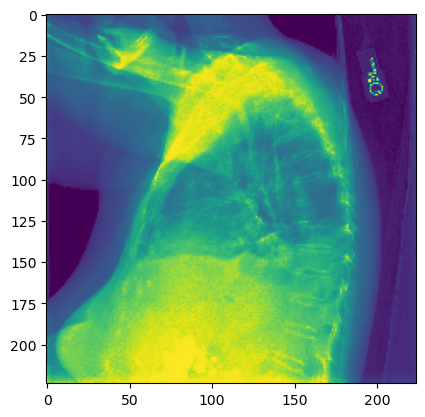

In [85]:
plt.imshow(df_imcxr[4])

# check patient selection

In [81]:
patients = np.random.randint(0,34000,20)

for idx in patients:
    #Load precomputed file
    filename = f"{idx:08d}" + '.pkl'
    print("FILE ", filename)
    filepath = core_mimiciv_path + 'pickle/' + filename
    with open(filepath, 'rb') as input:  
            patient = pickle.load(input)
    # Get information of chest x-rays conducted within this patiewnt stay
    df_cxr = patient.cxr
    admittime = patient.admissions.admittime.values[0]
    dischtime = patient.admissions.dischtime.values[0]
    df_stay_cxr = df_cxr.loc[(df_cxr['charttime'] >= admittime) & (df_cxr['charttime'] <= dischtime)]
    print("admittime: ", admittime)
    print("dischtime: ", dischtime)
    print(df_stay_cxr.shape[0], "available image(s): ", df_stay_cxr.drop(columns=['dicom_id','subject_id','ProcedureCodeSequence_CodeMeaning','StudyDate','StudyTime','ViewCodeSequence_CodeMeaning','deltacharttime']))

FILE  00033586.pkl
admittime:  2143-08-16T04:56:00.000000000
dischtime:  2143-08-18T15:19:00.000000000
0 available image(s):  Empty DataFrame
Columns: [study_id, split, Atelectasis, Cardiomegaly, Consolidation, Edema, Enlarged Cardiomediastinum, Fracture, Lung Lesion, Lung Opacity, No Finding, Pleural Effusion, Pleural Other, Pneumonia, Pneumothorax, Support Devices, PerformedProcedureStepDescription, ViewPosition, Rows, Columns, PatientOrientationCodeSequence_CodeMeaning, StudyDateForm, StudyTimeForm, cxrtime, charttime]
Index: []

[0 rows x 25 columns]
FILE  00009479.pkl
admittime:  2175-10-02T20:38:00.000000000
dischtime:  2175-10-28T17:50:00.000000000
0 available image(s):  Empty DataFrame
Columns: [study_id, split, Atelectasis, Cardiomegaly, Consolidation, Edema, Enlarged Cardiomediastinum, Fracture, Lung Lesion, Lung Opacity, No Finding, Pleural Effusion, Pleural Other, Pneumonia, Pneumothorax, Support Devices, PerformedProcedureStepDescription, ViewPosition, Rows, Columns, Patie

In [3]:
df = pd.read_csv('/export/scratch2/constellation-data/malafaia/physionet.org/files/mimiciv/1.0/icu/chartevents.csv.gz')
df.head()

/tmp/ipykernel_865855/1065811561.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/export/scratch2/constellation-data/malafaia/physionet.org/files/mimiciv/1.0/icu/chartevents.csv.gz')


,subject_id,hadm_id,stay_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10003700,28623837,30600691,2165-04-24 05:10:00,2165-04-24 05:11:00,228236,0.0,0.0,NaN,0
1,10003700,28623837,30600691,2165-04-24 05:12:00,2165-04-24 05:14:00,225067,0.0,0.0,NaN,0
2,10003700,28623837,30600691,2165-04-24 05:12:00,2165-04-24 05:14:00,225070,1.0,1.0,NaN,0
3,10003700,28623837,30600691,2165-04-24 05:12:00,2165-04-24 05:14:00,225076,1.0,1.0,NaN,0
4,10003700,28623837,30600691,2165-04-24 05:12:00,2165-04-24 05:14:00,225078,1.0,1.0,NaN,0


In [4]:
new_df = df[['subject_id', 'hadm_id', 'stay_id', 'charttime']]
new_df

,subject_id,hadm_id,stay_id,charttime
0,10003700,28623837,30600691,2165-04-24 05:10:00
1,10003700,28623837,30600691,2165-04-24 05:12:00
2,10003700,28623837,30600691,2165-04-24 05:12:00
3,10003700,28623837,30600691,2165-04-24 05:12:00
4,10003700,28623837,30600691,2165-04-24 05:12:00
...,...,...,...,...
329499783,19999068,21606769,30143796,2161-08-30 20:00:00
329499784,19999068,21606769,30143796,2161-08-30 20:00:00
329499785,19999068,21606769,30143796,2161-08-30 20:00:00
329499786,19999068,21606769,30143796,2161-08-30 21:00:00


In [5]:
new_df.to_csv('/export/scratch2/constellation-data/malafaia/physionet.org/files/mimiciv/1.0/icu/short_chartevents.csv')

In [3]:
path = '/export/scratch2/constellation-data/malafaia/physionet.org/files/mimiciv/1.0/pickle/'
listdir = os.listdir(path)
print(len(listdir))

14441


In [ ]:
# Full Core MIMIC-IV database path
core_mimiciv_path = '/export/scratch2/constellation-data/malafaia/physionet.org/files/mimiciv/1.0/'
df_haim_ids = pd.read_csv(core_mimiciv_path + 'pickle/haim_mimiciv_key_ids.csv')
# Get Key dictionary
df_patientevents_categorylabels_dict = load_haim_event_dictionaries(core_mimiciv_path)
# Get core data
df_haim_ids_core_info = load_core_mimic_haim_info(core_mimiciv_path, df_haim_ids)

In [2]:
# Define MIMIC IV Data Location
#core_mimiciv_path = 'data/HAIM/physionet/files/mimiciv/1.0/'
core_mimiciv_path = '/export/scratch2/constellation-data/malafaia/physionet.org/files/mimiciv/1.0/'

# Define MIMIC IV Image Data Location (usually external drive)
#core_mimiciv_imgcxr_path = 'data/HAIM/physionet/files/mimiciv/1.0/mimic-cxr-jpg/2.0.0/'
core_mimiciv_imgcxr_path = '/export/scratch2/constellation-data/malafaia/physionet.org/files/mimic-cxr-jpg/2.0.0/'

In [ ]:
# Let's select a single HAIM Patient from pickle files and check if it fits inclusion criteria
haim_patient_idx = 0

# Select allowed timestamp range
start_hr = None
end_hr = None

#Load precomputed file
filename = f"{haim_patient_idx:08d}" + '.pkl'
filepath = core_mimiciv_path + 'pickle/' + filename
with open(filepath, 'rb') as input:  
        patient =  pickle.load(input)
dt_patient = get_timebound_patient_icustay(patient, start_hr , end_hr)

# Define inclusion criteria
inclusion_criteria =[['ischemic heart disease', 'heart disease (ischemic)', 'heart disease'], ['acute respiratory failure', 'respiratory failure'], ['hypertension'],["died"]]
is_included, inclusion_criteria_mask = is_haim_patient_inclusion_criteria_match(dt_patient, inclusion_criteria, verbose=0)
get_visioin_embedding(dt_patient)

In [2]:
filepath = '/export/scratch2/constellation-data/malafaia/physionet.org/files/mimiciv/1.0/pickle/00006515.pkl'
with open(filepath, 'rb') as input:  
        patient = pickle.load(input)

In [3]:
patient

In [15]:
# Get information of chest x-rays conducted within this patiewnt stay
df_cxr = patient.cxr
df_imcxr = patient.imcxr
admittime = patient.admissions.admittime.values[0]
dischtime = patient.admissions.dischtime.values[0]
df_stay_cxr = df_cxr.loc[(df_cxr['charttime'] >= admittime) & (df_cxr['charttime'] <= dischtime)]

In [16]:
df_stay_cxr

,dicom_id,study_id,subject_id,split,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,...,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,StudyDateForm,StudyTimeForm,charttime,deltacharttime
12,7cc4fde5-0f74718e-7978f3e6-177e524d-6c79cfce,59878718.0,11922120.0,train,NaN,NaN,NaN,NaN,NaN,NaN,...,3050.0,21841125.0,150156.734,CHEST (PORTABLE AP),antero-posterior,Erect,2184-11-25,15:01:56.734000,2184-11-25 15:01:00,2.066667
15,2e250b31-08967352-209772ed-6fb5ed1f-c19a2496,56001427.0,11922120.0,train,NaN,NaN,NaN,1.0,NaN,NaN,...,3050.0,21841126.0,24837.312,CHEST (PORTABLE AP),antero-posterior,Erect,2184-11-26,02:48:37.312000,2184-11-26 02:48:00,13.850000
25,91d95c88-dcbcc6a0-a6620f7b-3920e61d-00b7cce7,56187147.0,11922120.0,train,NaN,NaN,NaN,0.0,NaN,NaN,...,3056.0,21841202.0,135740.484,CHEST (PORTABLE AP),antero-posterior,Erect,2184-12-02,13:57:40.484000,2184-12-02 13:57:00,169.000000
27,94a1b870-4f456c33-7a6c51b9-c0640ec4-67eb86c5,50551044.0,11922120.0,train,NaN,NaN,NaN,1.0,NaN,NaN,...,3050.0,21841125.0,191615.843,CHEST (PORTABLE AP),antero-posterior,Erect,2184-11-25,19:16:15.843000,2184-11-25 19:16:00,6.316667


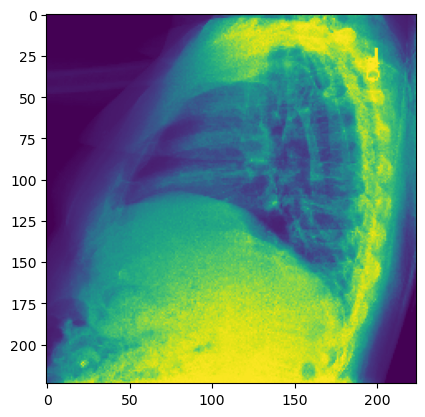

In [14]:
plt.imshow(patient.imcxr[10])